In [1]:
pip install opencv-python

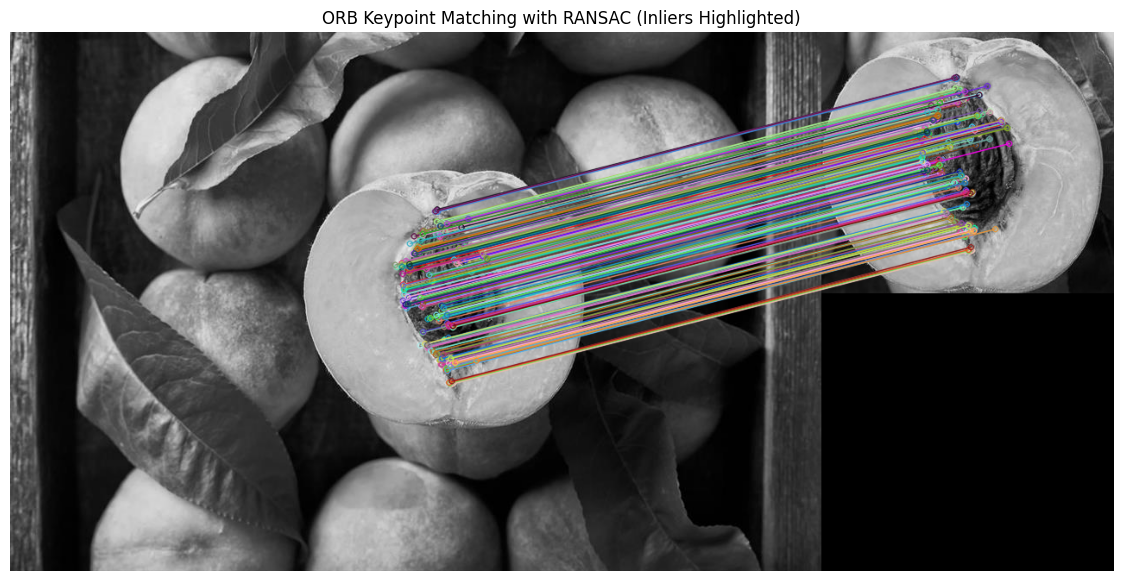

In [5]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale images
img1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('imgg1.jpg', cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    print("Error loading images!")
else:
    # Step 1: Detect ORB keypoints and descriptors
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Step 2: Match using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    matches = bf.knnMatch(des1, des2, k=2)

    # Step 3: Apply Lowe's ratio test to find good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    if len(good_matches) > 4:
        # Step 4: Extract locations of good matches
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        # Step 5: Compute homography using RANSAC
        H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()

        # Step 6: Draw matches (highlighting only inliers using matchesMask)
        result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                                 matchesMask=matchesMask,
                                 flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        # Step 7: Show result
        plt.figure(figsize=(15, 7))
        plt.imshow(result)
        plt.title("ORB Keypoint Matching with RANSAC (Inliers Highlighted)")
        plt.axis("off")
        plt.show()
    else:
        print("Not enough good matches found to compute homography.")

